# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [107]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [5]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [6]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [7]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [8]:
data['found']

262

Количество страниц в результатах поиска

In [9]:
data['pages']

27

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [10]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,employer.logo_urls,department.id,department.name
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-28T14:31:00+0300,2023-02-28T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.7232,37.5038,NaN,NaN,NaN,NaN
3,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-03-01T15:00:20+0300,2023-03-01T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-03-01T12:06:39+0300,2023-03-01T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [11]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [12]:
URL = 'https://api.hh.ru/vacancies'
params = dict(text="\"AI\" OR"
                    "\"Big Data\" OR"
                    "\"Data Analysis\" OR"
                    "\"Data Analyst\" OR"
                    "\"Data Engineer\" OR"
                    "\"Data Science\" OR"
                    "\"Data Scientist\" OR"
                    "\"ML\" OR"
                    "\"Machine learning\" OR"
                    "\"Анализ Данных\" OR"
                    "\"Аналитик Данных\" OR"
                    "\"Инженер Данных\" OR"
                    "\"Машинное обучение\"",
               area=1,
               page={},
               per_page=100)
req = requests.get(URL, params)
data = json.loads(req.content.decode())

Для дальнейшей обработки данных пройдем по всем страницам и сформируем полный список.

In [13]:
pages = []
for i in range(0, data['pages']):
    params['page'] = i
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    pages.append(pd.json_normalize(data['items']))
    sleep(1)

# Соберем данные со всех страниц в один DataFrame
pages_df = pd.concat(pages)
pages_df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lng,salary.from,salary.to,salary.currency,salary.gross,department.id,department.name,insider_interview.id,insider_interview.url,employer.logo_urls
0,77502305,False,Аналитик данных / Data analyst,NaN,False,True,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77590907,False,Data Engineer / Инженер данных,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77580796,False,Data Scientist,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77586678,False,Data Analyst,NaN,False,False,NaN,NaN,None,None,...,37.581242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77587338,False,Senior Machine Learning Engineer,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

Заметим, что дубликаты имеют равные значения "id"

In [14]:
pages_df.reset_index(inplace=True)
pages_df.drop_duplicates(subset=['id'], inplace=True)
pages_df.drop('index', axis=1, inplace=True)
pages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1999
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1987 non-null   object 
 1   premium                      1987 non-null   bool   
 2   name                         1987 non-null   object 
 3   department                   0 non-null      float64
 4   has_test                     1987 non-null   bool   
 5   response_letter_required     1987 non-null   bool   
 6   salary                       0 non-null      float64
 7   address                      0 non-null      float64
 8   response_url                 0 non-null      object 
 9   sort_point_distance          0 non-null      object 
 10  published_at                 1987 non-null   object 
 11  created_at                   1987 non-null   object 
 12  archived                     1987 non-null   bool   
 13  apply_alternate_ur

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [15]:
vacancies_info= []
key_skills = []
employer_name = []
experience = []
coordinate_lat = []
coordinate_lng = []

for s in range(0, pages_df.shape[0]):
    vacancy = pages_df['id'].iloc[s]
    req = requests.get(f'https://api.hh.ru/vacancies/{vacancy}')
    info = json.loads(req.content.decode())

    if 'errors' in info:
      print('тебя приняли за DDOS атакующего :(( ')
      break

    # добавляем описание вакансии
    vacancies_info.append(info['description'])

    # добавляем ключевые навыки 
    key_skills.append([skill['name'] for skill in info['key_skills']])

    # обрабатываем работодателя текущей вакансии
    if info['employer'] is not None and 'name' in info['employer']:
        employer_name.append(info['employer']['name'])
    else:
        employer_name.append(None)

    # обрабатываем требуемый опыт работы
    if info['experience'] is not None and 'id' in info['experience']:
        experience.append(info['experience']['id'])
    else:
        experience.append(None)

    # обрабатываем координаты рабочего места
    if info['address'] is not None and 'lat' in info['address']:
        coordinate_lat.append(info['address']['lat'])
    else:
        coordinate_lat.append(None)

    if info['address'] is not None and 'lng' in info['address']:
        coordinate_lng.append(info['address']['lng'])
    else:
        coordinate_lng.append(None)

    sleep(0.5)

Исходная таблица содержит много незаполненных работодателями полей (большинство объектов в них нулевые), оставлю часть тех, в которых содержится полезная информация.

In [55]:
target_fields = ['id', 'name', 'has_test', 'response_letter_required', 'working_days', 'accept_temporary','professional_roles', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross']
pages_df_new = pages_df.loc[:, target_fields]

Далее добавим поля, загруженные два шага назад.

In [56]:
pages_df_new['vacancy_info'] = vacancies_info
pages_df_new['key_skills'] = key_skills
pages_df_new['experience'] = experience
pages_df_new['employer_name'] = employer_name

Сохраним полученную таблицу в требуемом формате.

In [57]:
pages_df_new.to_excel('vacancies_info.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [21]:
data['found']

5285

Заметим, что в xlsx таблице всего 2000 строк, это связано с ограничениями API hh.ru

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [20]:
popular_skills = {}
for i in range(len(key_skills)):
  skills_list = [j.lower() for j in key_skills[i][:]]
  for skill in skills_list:
    if skill in popular_skills:
      popular_skills[skill] += 1
    else:
      popular_skills[skill] = 1

Для того, чтобы визуализировать полученную информацию, создадим DataFrame из отсортированных данных.

In [42]:
sorted_skills_tmp = sorted(popular_skills.items(), key=lambda item: item[1], reverse=True)
sorted_skills = pd.DataFrame(sorted_skills_tmp, columns=['Навык', 'Количество упоминаний'])

Визуализация:

Text(0.5, 1.0, 'Топ-15 навыков из резюме для профессии Data Science')

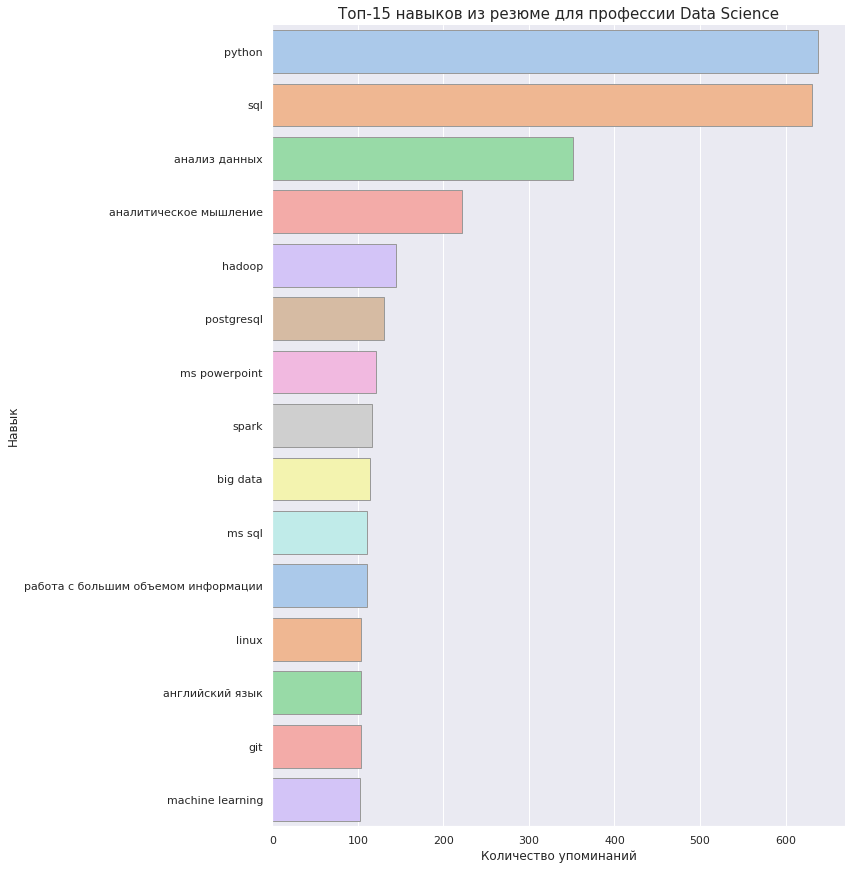

In [52]:
sns.set(rc={'figure.figsize':(100,100)}, font_scale=1)
sns.catplot(data=sorted_skills[0:15], x='Количество упоминаний', y='Навык', height=12, kind='bar', palette="pastel", edgecolor=".6")
plt.title('Топ-15 навыков из резюме для профессии Data Science', fontsize=15)

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Для начала выделим отдельный DataFrame, содержащий информацию о зарплате

In [60]:
salary_target_fields = ['salary.from', 'salary.to', 'salary.currency', 'salary.gross']
salary_info = pages_df_new.loc[:, salary_target_fields]

In [61]:
# Уберем пропуски в данных
salary_info.dropna(inplace=True)

Проанализируем зарплату в рублях и построим гистограмму, которая отражает количество вакансий для среднего арифметического зарплатной вилки

Text(0, 0.5, 'Число вакансий')

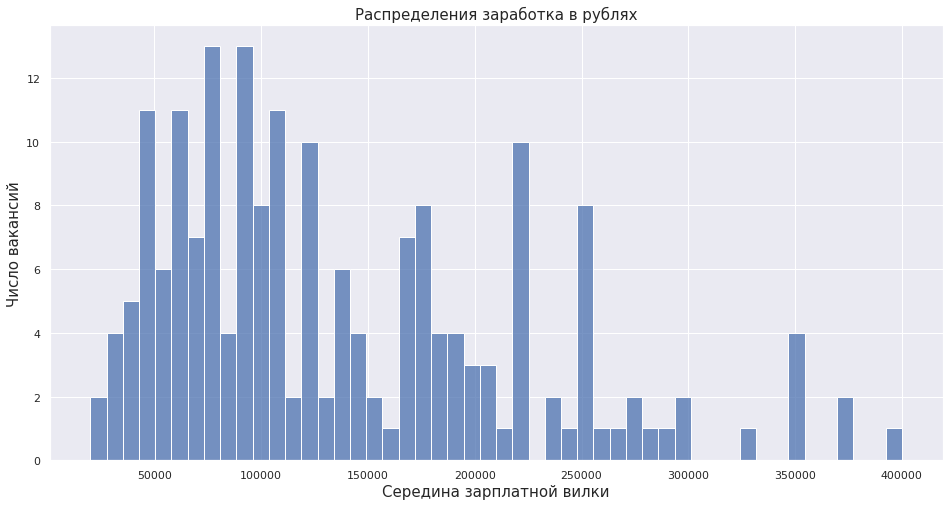

In [72]:
salary_in_rubles = salary_info[salary_info['salary.currency'] == 'RUR']
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.histplot(data=salary_in_rubles, x=(salary_in_rubles['salary.from'] + salary_in_rubles['salary.to']) / 2, bins=50, palette='pastel')
plt.title('Распределения заработка в рублях', fontsize=15)
plt.xlabel('Середина зарплатной вилки', fontsize=15)
plt.ylabel('Число вакансий', fontsize=15)

Проанализируем таким же образом зарплату в долларах

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Text(0, 0.5, 'Число вакансий')

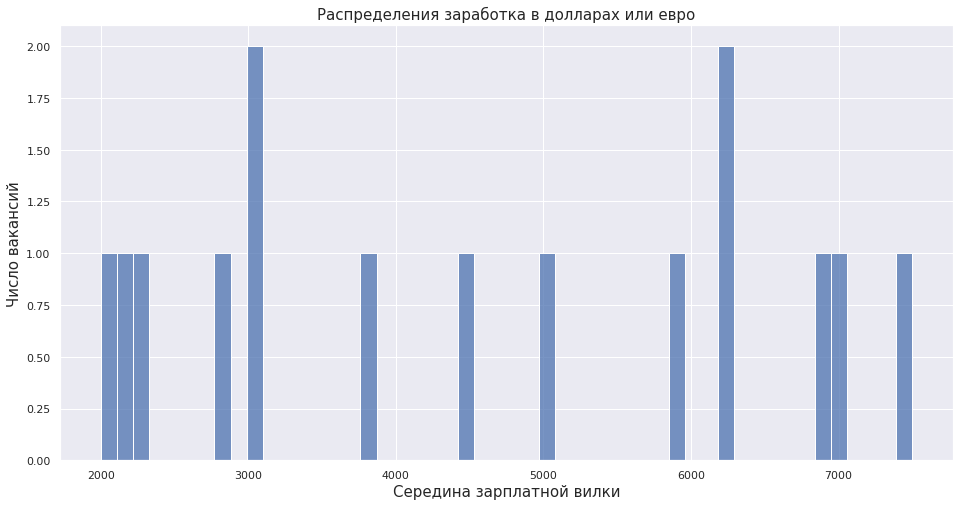

In [81]:
salary_in_for_curr = salary_info[(salary_info['salary.currency'] == 'USD') | (salary_info['salary.currency'] == 'EUR')]
coef_usd_to_eur = 1.06
salary_in_for_curr.loc[salary_in_for_curr['salary.currency'] == 'EUR', ['salary.from', 'salary.to']] *= coef_usd_to_eur
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.histplot(data=salary_in_for_curr, x=(salary_in_for_curr['salary.from'] + salary_in_for_curr['salary.to']) / 2, bins=50, palette='pastel')
plt.title('Распределения заработка в долларах или евро', fontsize=15)
plt.xlabel('Середина зарплатной вилки', fontsize=15)
plt.ylabel('Число вакансий', fontsize=15)

Анализ gross/net

In [85]:
offer_with_gross = salary_info['salary.gross'].count()
offer_with_net = pages_df_new['salary.gross'].count() - offer_with_gross
print('Количество преложений с зарплатой gross ', offer_with_gross)
print('Количество преложений с зарплатой net ', offer_with_net)

Количество преложений с зарплатой gross  204
Количество преложений с зарплатой net  237


**Выводы**:


1.   Человеку, желающему найти работу в сфере Data Science, необходимы знания Python, SQL и анализа данных, не лишним будет иметь аналитическое мышление. Расширенный список требуемых работодателями навыков можно увидеть на графике в вопросе 2.
2.   На рынке вакансий сейчас большой спрос на начинающих специалистов и специалистов средней квалификации (этот вывод сделан из того, что наибольшее количество вакансий имеют среднее арифметическое зарплатной вилки - 100 тысяч рублей). Также можно сделать вывод, что работа в Data Science - одна из самых высокоплачиваемых, потому что много предложений находятся в зарплатной вилке 400 тысяч - 500 тысяч.
3. Данных о заработке в иностранной валюте на сайте hh.ru не очень много, но эти предложения все еще высокооплачиваемые: заработная плата колеблется от 4000$ до 14000$
4. Большинство работодалетей указывают зарплату с вычетом налогов, т.е. в формате net.
Мое исследование было ограничено количеством данных (ограничение в 2000 со стороны API hh.ru), также при рассмотрении зарплатных вилок я не учитывала такие показатели как количество рабочих часов и наличие/отсутствие gross/net.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Согласно статистике из интернета, самой популярной вакансией на сайте hh.ru является "Менеджер по продажам". Мне стало интересно исследовать причину популярности этой вакансии, требования работодателей и размеры заработной платы.

Сформирую новый шаблон для запроса:



In [39]:
URL = 'https://api.hh.ru/vacancies'
params = dict(text="\"Менеджер по продажам\" OR"
                    "\"Sales Manager\" OR"
                    "\"Менеджер по работе с клиентами\" OR",
               area=1,
               page={},
               per_page=100)
req = requests.get(URL, params)
data_manager = json.loads(req.content.decode())

Сформирую полный список всех найденных вакансий

In [40]:
pages_manager = []
for i in range(0, data_manager['pages']):
    params['page'] = i
    req = requests.get(URL, params)
    data_manager = json.loads(req.content.decode())
    pages_manager.append(pd.json_normalize(data_manager['items']))
    sleep(0.5)

# Соберем данные со всех страниц в один DataFrame
pages_manager_df = pd.concat(pages_manager)
pages_manager_df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,schedule.id,schedule.name,address,address.metro,employer.logo_urls,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,72786164,True,Менеджер по продажам / Sales manager (в офис),None,False,True,None,None,2023-03-02T22:51:53+0300,2023-03-02T22:51:53+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77005817,True,Менеджер по продажам (без поиска / удаленно),None,False,False,None,None,2023-03-03T10:00:29+0300,2023-03-03T10:00:29+0300,...,remote,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77491403,True,Менеджер по продажам (без поиска клиентов),None,False,False,None,None,2023-02-28T15:25:49+0300,2023-02-28T15:25:49+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77125671,False,Менеджер по продажам и работе с клиентами,None,False,False,None,None,2023-03-01T12:10:48+0300,2023-03-01T12:10:48+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76141770,True,Менеджер по продажам,None,False,False,None,None,2023-03-02T17:28:06+0300,2023-03-02T17:28:06+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалю дубликаты

In [41]:
pages_manager_df.reset_index(inplace=True)
pages_manager_df.drop_duplicates(subset=['id'], inplace=True)
pages_manager_df.drop('index', axis=1, inplace=True)
pages_manager_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1999
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1999 non-null   object 
 1   premium                      1999 non-null   bool   
 2   name                         1999 non-null   object 
 3   department                   0 non-null      object 
 4   has_test                     1999 non-null   bool   
 5   response_letter_required     1999 non-null   bool   
 6   response_url                 0 non-null      object 
 7   sort_point_distance          0 non-null      object 
 8   published_at                 1999 non-null   object 
 9   created_at                   1999 non-null   object 
 10  archived                     1999 non-null   bool   
 11  apply_alternate_url          1999 non-null   object 
 12  insider_interview            0 non-null      object 
 13  url               

Сформирую более удобную таблицу для дальнейших действий

In [42]:
vacancies_info_manager= []
key_skills_manager = []
employer_name_manager = []
experience_manager = []
coordinate_lat_manager = []
coordinate_lng_manager = []

for s in range(0, pages_manager_df.shape[0]):
    vacancy = pages_manager_df['id'].iloc[s]
    req = requests.get(f'https://api.hh.ru/vacancies/{vacancy}')
    info = json.loads(req.content.decode())

    if 'errors' in info:
      print('тебя приняли за DDOS атакующего :(( ')
      break

    # добавляем описание вакансии
    vacancies_info_manager.append(info['description'])

    # добавляем ключевые навыки 
    key_skills_manager.append([skill['name'] for skill in info['key_skills']])

    # обрабатываем работодателя текущей вакансии
    if info['employer'] is not None and 'name' in info['employer']:
        employer_name_manager.append(info['employer']['name'])
    else:
        employer_name_manager.append(None)

    # обрабатываем требуемый опыт работы
    if info['experience'] is not None and 'id' in info['experience']:
        experience_manager.append(info['experience']['id'])
    else:
        experience_manager.append(None)

    # обрабатываем координаты рабочего места
    if info['address'] is not None and 'lat' in info['address']:
        coordinate_lat_manager.append(info['address']['lat'])
    else:
        coordinate_lat_manager.append(None)

    if info['address'] is not None and 'lng' in info['address']:
        coordinate_lng_manager.append(info['address']['lng'])
    else:
        coordinate_lng_manager.append(None)

    sleep(0.5)


Выбираю из DataFrame интересующие меня поля

In [43]:
target_fields = ['id', 'name', 'has_test', 'response_letter_required', 'working_days', 'accept_temporary','professional_roles', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross']
pages_manager_df_new = pages_manager_df.loc[:, target_fields]

In [44]:
pages_manager_df_new['vacancy_info'] = vacancies_info_manager
pages_manager_df_new['key_skills'] = key_skills_manager
pages_manager_df_new['experience'] = experience_manager
pages_manager_df_new['employer_name'] = employer_name_manager


In [45]:
pages_manager_df_new.to_excel('manager_vacancies_info.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [46]:
data_manager['found']

15839

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

In [47]:
popular_skills_manager = {}
for i in range(len(key_skills_manager)):
  skills_list = [j.lower() for j in key_skills_manager[i][:]]
  for skill in skills_list:
    if skill in popular_skills_manager:
      popular_skills_manager[skill] += 1
    else:
      popular_skills_manager[skill] = 1

Отсортирую данные и сформирую DataFrame

In [48]:
sorted_skills_tmp = sorted(popular_skills_manager.items(), key=lambda item: item[1], reverse=True)
sorted_skills_manager = pd.DataFrame(sorted_skills_tmp, columns=['Навык', 'Количество упоминаний'])

Визуализирую найденные данные

Text(0.5, 1.0, 'Топ-15 необходимых навыков для менежера по продажам')

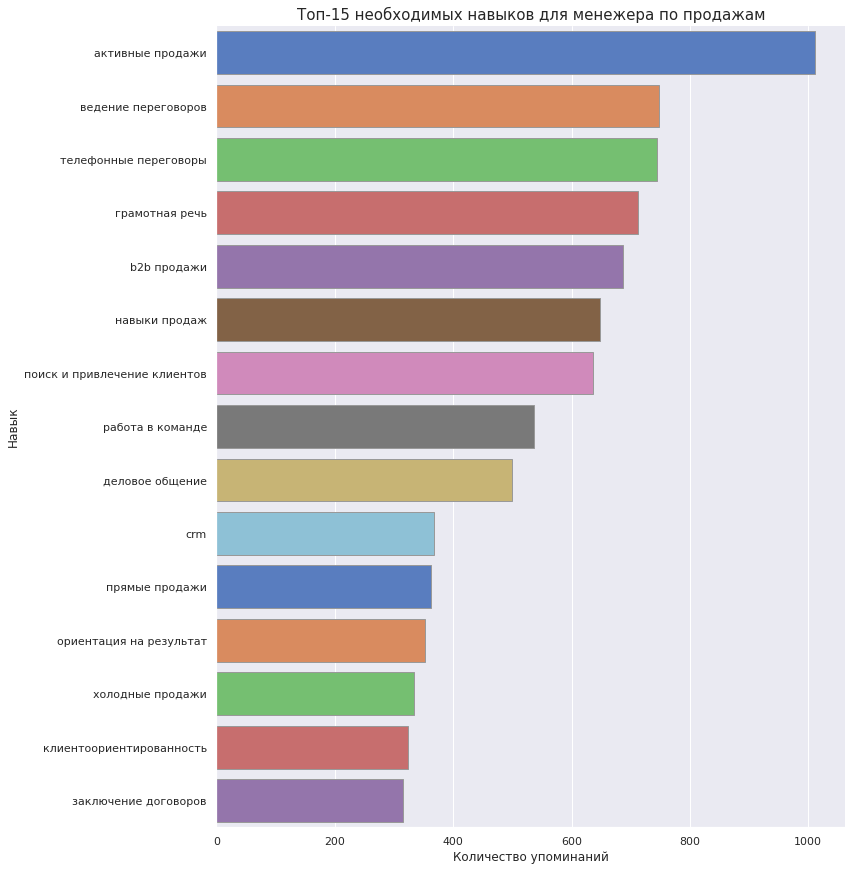

In [51]:
sns.set(rc={'figure.figsize':(100,100)}, font_scale=1)
sns.catplot(data=sorted_skills_manager[0:15], x='Количество упоминаний', y='Навык', height=12, kind='bar', palette="muted", edgecolor=".6")
plt.title('Топ-15 необходимых навыков для менежера по продажам', fontsize=15)

Навыки вроде "ведение переговоров", "грамотная речь" и "деловое общение" представляют синонимиченые требования, поэтому для полноты картины я объединю эти признаки.

In [55]:
popular_skills_manager_tmp = popular_skills_manager.copy()
popular_skills_manager_tmp['ведение переговоров'] += popular_skills_manager_tmp['грамотная речь'] + popular_skills_manager_tmp['деловое общение']
popular_skills_manager_tmp.pop('грамотная речь')
popular_skills_manager_tmp.pop('деловое общение')
sorted_skills_tmp = sorted(popular_skills_manager_tmp.items(), key=lambda item: item[1], reverse=True)
sorted_skills_manager = pd.DataFrame(sorted_skills_tmp, columns=['Навык', 'Количество упоминаний'])

Text(0.5, 1.0, 'Топ-15 необходимых навыков для менежера по продажам')

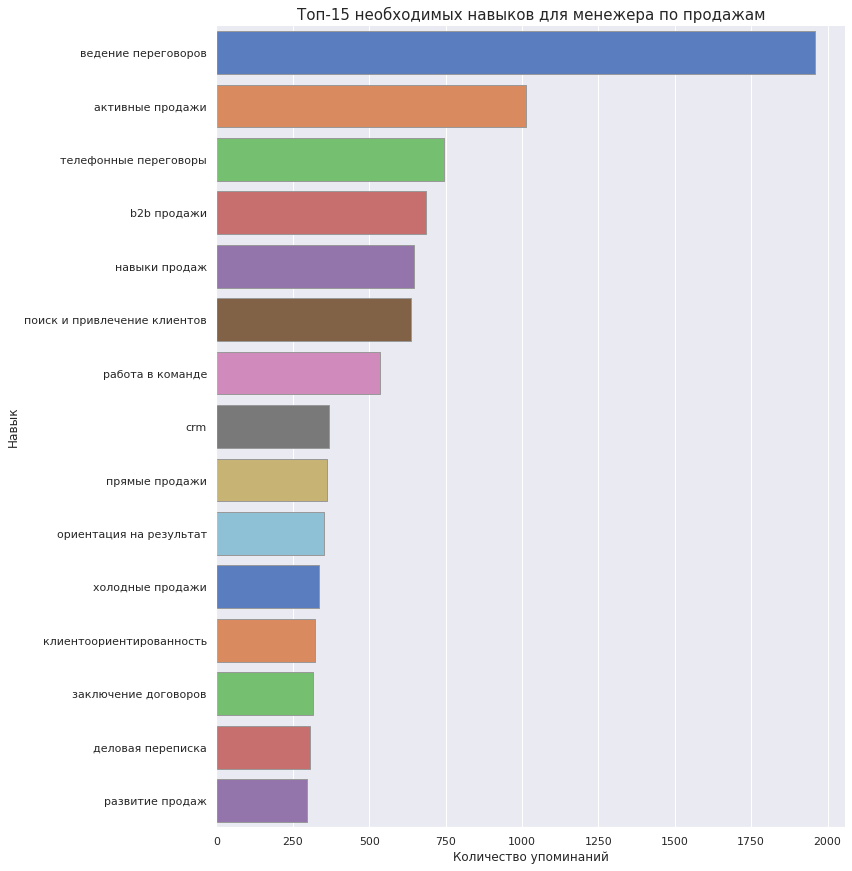

In [56]:
sns.set(rc={'figure.figsize':(100,100)}, font_scale=1)
sns.catplot(data=sorted_skills_manager[0:15], x='Количество упоминаний', y='Навык', height=12, kind='bar', palette="muted", edgecolor=".6")
plt.title('Топ-15 необходимых навыков для менежера по продажам', fontsize=15)

После объединения схожих навыков, количество требований "ведение переговоров" увеличилось почти в 2 раза, также появились 3 новых навыка: "заключение договора", "деловая переписка" и "развитие продаж".

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

Выделю DataFrame, содержащий лишь инфомацию о зарплате

In [57]:
salary_target_fields = ['salary.from', 'salary.to', 'salary.currency', 'salary.gross']
salary_info_manager = pages_manager_df_new.loc[:, salary_target_fields]
# Уберем пропуски в данных
salary_info_manager.dropna(inplace=True)

Визуализация обработанных данных:

Text(0, 0.5, 'Число вакансий')

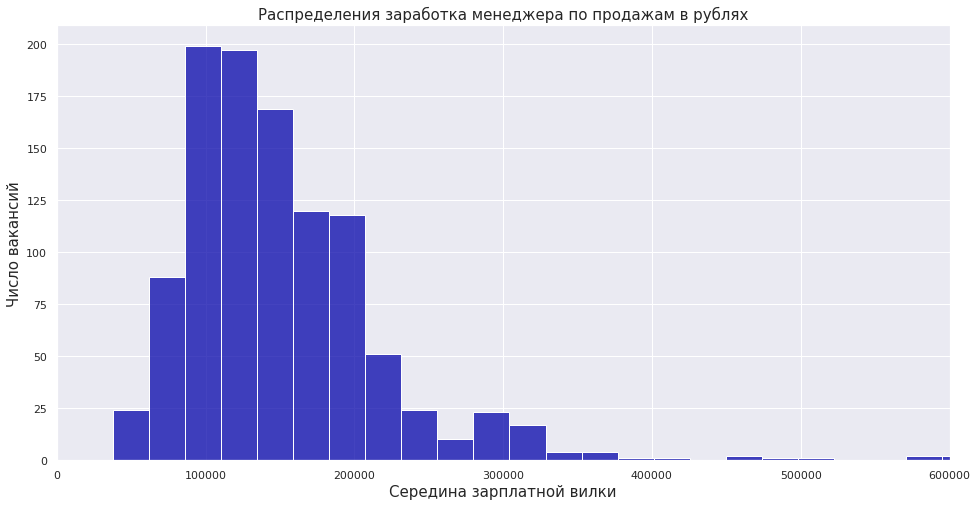

In [63]:
salary_in_rubles = salary_info_manager[salary_info_manager['salary.currency'] == 'RUR']
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.histplot(data=salary_in_rubles, x=(salary_in_rubles['salary.from'] + salary_in_rubles['salary.to']) / 2, bins=50, color='#0504aa')
plt.xlim((0, 600000))
plt.title('Распределения заработка менеджера по продажам в рублях', fontsize=15)
plt.xlabel('Середина зарплатной вилки', fontsize=15)
plt.ylabel('Число вакансий', fontsize=15)

Теперь проанализирую предлагаемые доходы менеджера в иностранной валюте.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


Text(0, 0.5, 'Число вакансий')

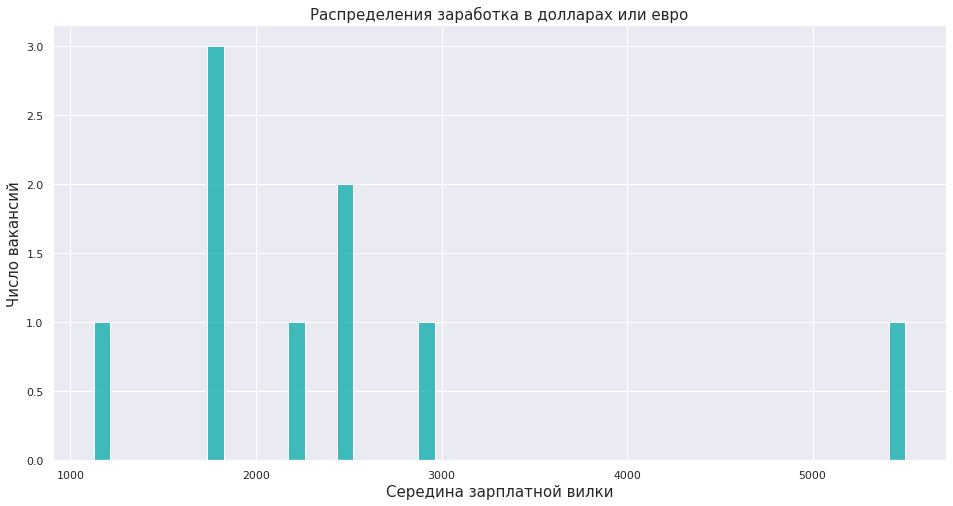

In [66]:
salary_in_for_curr = salary_info_manager[(salary_info_manager['salary.currency'] == 'USD') | (salary_info_manager['salary.currency'] == 'EUR')]
coef_usd_to_eur = 1.06
salary_in_for_curr.loc[salary_in_for_curr['salary.currency'] == 'EUR', ['salary.from', 'salary.to']] *= coef_usd_to_eur
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.histplot(data=salary_in_for_curr, x=(salary_in_for_curr['salary.from'] + salary_in_for_curr['salary.to']) / 2, bins=50, color='#05aaaa')
plt.title('Распределения заработка в долларах или евро', fontsize=15)
plt.xlabel('Середина зарплатной вилки', fontsize=15)
plt.ylabel('Число вакансий', fontsize=15)

**Выводы:**


1.   Наиболее популярными требуемыми навыками для профессии менеджер по продажам являются умение вести переговоры (как лично, так и по телефону), а также умение осуществлять различного рода продажи (b2b, прямые, холодные)
2.   В отличие от профессии Data Scientist, где для каждого уровня квалификации специалиста есть более 10 предложений, для профессии Менеджер по продажам большинство предложений ориентировано на зарплатную вилку от 200к до 400к. Также есть очень небольшое количество вакансий с предложениями более 1 млн.
3.   Количество предложений о зарплате в иностранной валюте гораздо меньше количества предложений о зарплате в рублях. Должно быть, это связано с тем, что компании, нанаимающее менеджеров, ориентированы на работу внутри страны, а предложений от иностранных компаний не так уж и много.




---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Исследуемая вакансия - Менеджер по продажам

Проанализирую требуемый опыт:

Text(0.5, 1.0, 'Требуемый опыт работы для Менеджера по продажам')

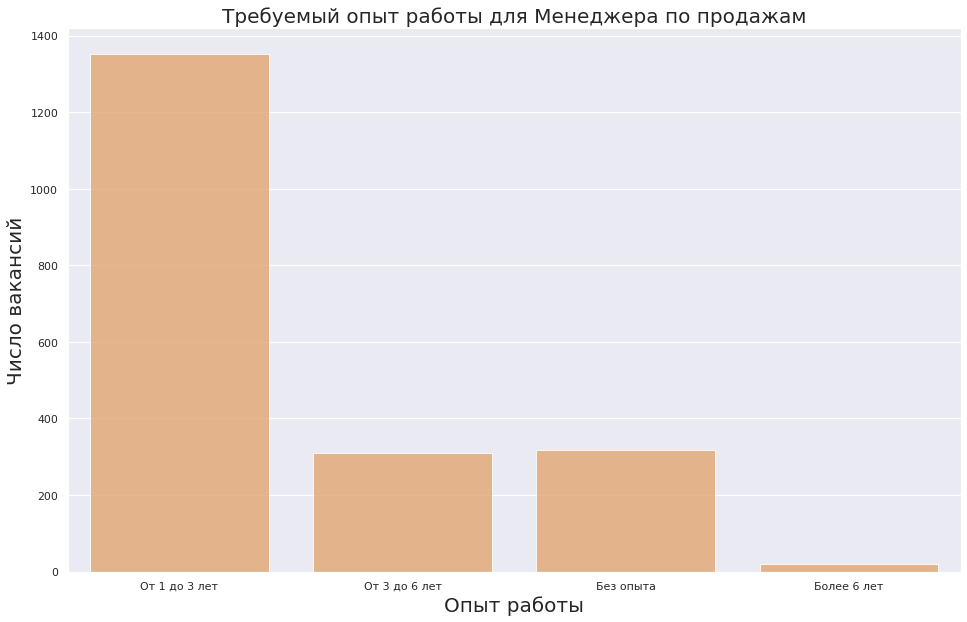

In [75]:
plt.figure(figsize=(16, 10))
fig = sns.countplot(x=experience_manager, color='sandybrown', alpha=0.8)
fig.set_xticklabels(('От 1 до 3 лет', 'От 3 до 6 лет', 'Без опыта', 'Более 6 лет'))
plt.xlabel('Опыт работы', fontsize=20)
plt.ylabel('Число вакансий', fontsize=20)
plt.title('Требуемый опыт работы для Менеджера по продажам', fontsize=20)

Проанализирую топ работодателей:

In [78]:
companies = {}
for name in employer_name_manager:
    if name in companies:
        companies[name] += 1
    else:
        companies[name] = 1

sorted_companies_tmp = sorted(companies.items(), key=lambda item: item[1], reverse=True)
sorted_companies = pd.DataFrame(sorted_companies_tmp, columns=['Работодатель', 'Количество вакансий'])

Text(0, 0.5, 'Работодатель')

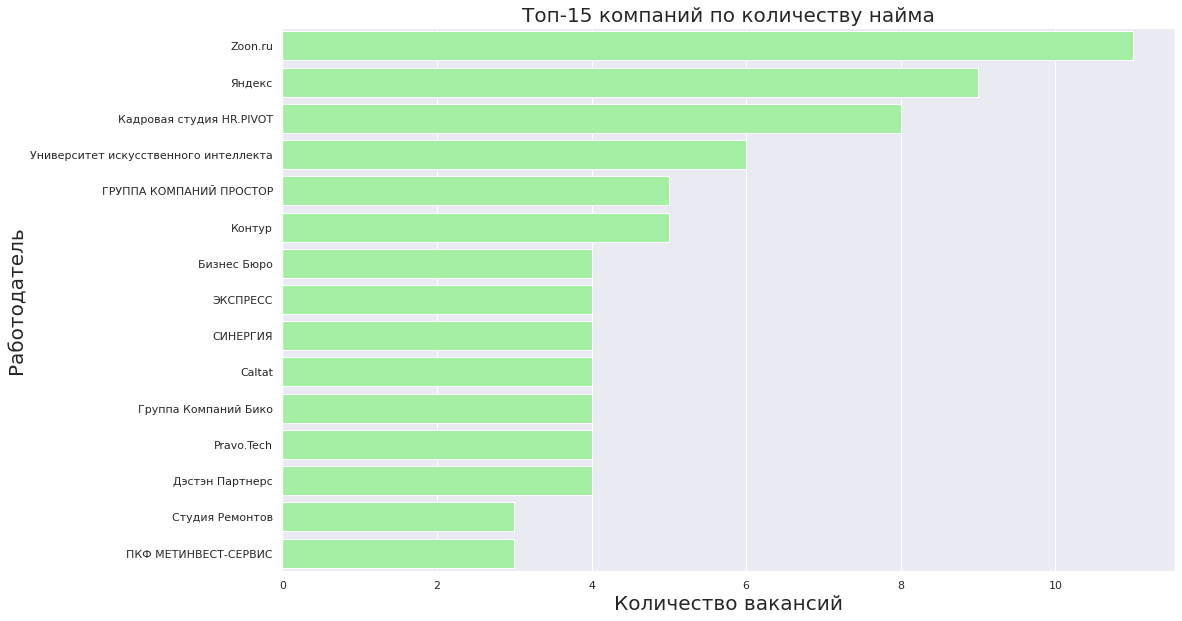

In [93]:
plt.figure(figsize=(16, 10))
sns.barplot(data=sorted_companies[0:15], x='Количество вакансий', y='Работодатель', color='palegreen')
plt.title('Топ-15 компаний по количеству найма', fontsize=20)
plt.xlabel('Количество вакансий', fontsize=20)
plt.ylabel('Работодатель', fontsize=20)

Исследую распределение количества вакансий по районам Москвы

In [106]:
import plotly.express as plotly_expr
fig = plotly_expr.scatter_mapbox(lat=pages_manager_df['address.lat'], lon=pages_manager_df['address.lng'], zoom=10, width=1000, height=1000, center={'lat' : 55.751244, 'lon' : 37.618423}, color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Какие выводы можно сделать из построенных графиков?

**Выводы:**


1.   Самое часто встречаемое требование об опыте работы - от 1 до 3 трех лет (возможно, тут работодатели предполагают, что кандидат молодой и ему будет проще заинтересовать покупателя)
2.   Самые активные работодатели - фирмы-поставщики услуг малому и среднему бизнесу и продукции клиентам. Например,zoon.ru - сервис, помогающий развиваться малому и среднему бизнесу благодаря отзывам людей, Яндекс - менеджеры помогают распространению рекламы все того же малого и среднего бизнеса и распространению премиум аккаунтов.
3.   Наибольшее количество вакансий находится внутри третьего транспортного кольца Москвы, далее идут северная и южная части. Это связано с большим количеством офисов крупных компаний-нанимателей из топа, которые располагают свои офисы в данных регионах.

